In [1]:
import numpy as np

In [2]:
X_size = 300

In [3]:
X = 2 * np.random.randn(X_size, 1)

In [4]:
y = 4 + 3 * X + np.random.randn(X_size, 1)

In [5]:
import matplotlib.pyplot as plt

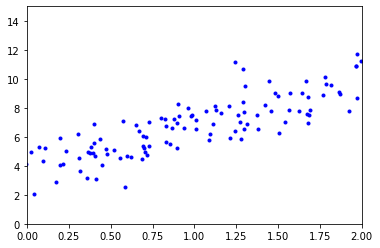

In [6]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
X_b = np.c_[np.ones((X_size, 1)), X] # Add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[3.93052472],
       [2.94829982]])

In [9]:
X_new = np.array([[0], [2]])

In [10]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # Add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[3.93052472],
       [9.82712435]])

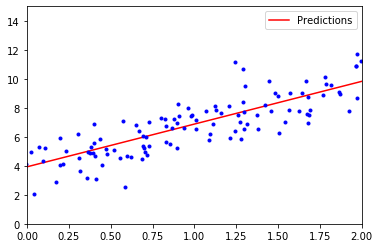

In [11]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [12]:
theta_best_min = theta_best - np.array([[1.5],[0]])
theta_best_max = theta_best + np.array([[1.5],[0]])

In [13]:
y_predict_min = X_new_b.dot(theta_best_min)
y_predict_max = X_new_b.dot(theta_best_max)

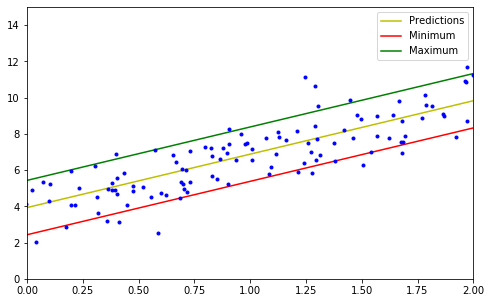

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(X_new, y_predict, "y-", label="Predictions")
plt.plot(X_new, y_predict_min, "r-", label="Minimum")
plt.plot(X_new, y_predict_max, "g-", label="Maximum")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

Mesma regressão linear implementada com scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lin_reg.intercept_, lin_reg.coef_

(array([3.93052472]), array([[2.94829982]]))

In [18]:
prediction = lin_reg.predict(X_new)
print(prediction)

[[3.93052472]
 [9.82712435]]


In [19]:
prediction[0]

array([3.93052472])

In [20]:
lin_reg.coef_

array([[2.94829982]])

### Batch Gradient Descent

In [21]:
eta = 0.05
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

In [22]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [23]:
theta

array([[3.93052472],
       [2.94829982]])

### Stochastic gradient descent

In [24]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyper parameters

In [25]:
def learning_schedule(t):
    return t0 / (t + t1)

In [26]:
theta = np.random.randn(2,1) # Random initialization

In [27]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi =   y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [28]:
theta

array([[3.79814684],
       [2.90546912]])

In [29]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88916915]), array([2.85381287]))

### Polynomial regression

In [31]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [32]:
X = np.sort(X)

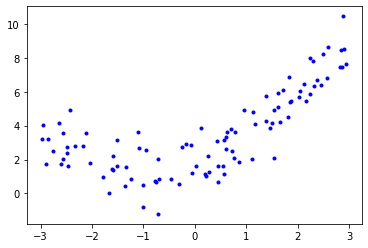

In [33]:
plt.plot(X, y, "b.")
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.62747204]
[0.62747204 0.39372116]


In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.82872614]), array([[0.946935 , 0.5022199]]))

In [36]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_predictions = lin_reg.predict(X_new_poly)
# print(y_predictions.shape)
# print(X_poly.shape)
# print(X.shape)

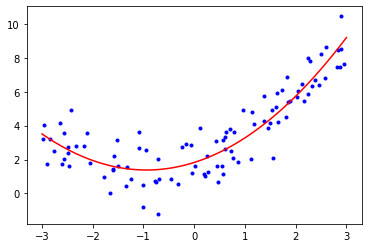

In [37]:
plt.plot(X, y, "b.") 
plt.plot(X_new, y_predictions, "r-")
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [39]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mse(y_train[:m], y_train_predict))
        val_errors.append(mse(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")

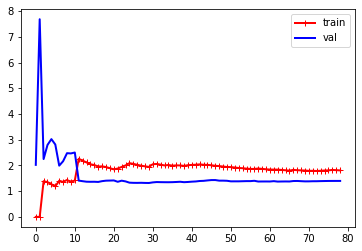

In [40]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend()

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
#    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

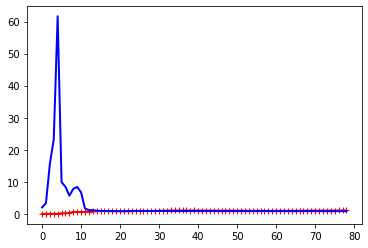

In [43]:
plot_learning_curves(polynomial_regression, X, y)

### Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [45]:
ridge_reg.predict([[1.5]])

array([[4.79159859]])

In [46]:
sgd_reg = SGDRegressor(penalty="l2", tol=1e-3, max_iter=1000)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.76469138])

### Lasso Regression

In [47]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
lasso_reg.predict([[1.5]])

array([4.75206918])

In [49]:
sgd_reg = SGDRegressor(penalty="l1", tol=1e-3, max_iter=1000)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [50]:
sgd_reg.predict([[1.5]])

array([4.79446695])

### Elastic Net

In [51]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
elastic_net.predict([[1.5]])

array([4.75413463])

### Early Stopping

In [53]:
from sklearn.base import clone

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=32)

In [54]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_val_rmse = None

In [55]:
train_errors, val_errors = [], []
n_epochs = 1000
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # due to warm_start the regressor continues where it left off
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict   = sgd_reg.predict(X_val_poly_scaled)
    train_error = mse(y_train, y_train_predict)
    val_error   = mse(y_val, y_val_predict)
    train_errors.append(train_error)
    val_errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        best_val_rmse = np.sqrt(minimum_val_error)

In [56]:
print(best_model)
print("Best Epoch:", best_epoch, "Minimum Validation Error:", minimum_val_error)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=32,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)
Best Epoch: 999 Minimum Validation Error: 0.9150109129722932


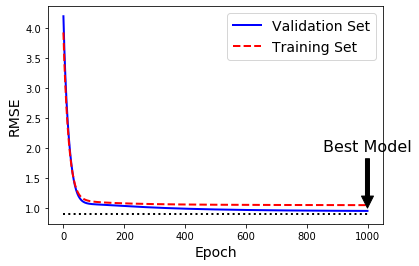

In [57]:
plt.annotate("Best Model", 
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.05),
             fontsize=16
            )
best_val_rmse -= 0.05
plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="Validation Set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training Set")
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.savefig("early_stopping_plot")
plt.show()

### Decision Boundaries

In [58]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [59]:
X = iris["data"][:, 3:] #petal width
y = (iris["target"] == 2).astype(np.int)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'Probability')

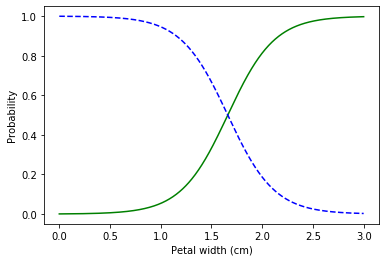

In [62]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

### Softmax Regression

In [63]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
softmax_reg.predict([[5, 2]])

array([2])

In [65]:
FORMAT = "{:.3f}"

In [66]:
probabilities = softmax_reg.predict_proba([[5, 2]])
probabilities = [FORMAT.format(prob) for prob in probabilities[0]]
probabilities

['0.000', '0.057', '0.943']

### Exercises

1-) Gradient descent can be used if the training set has millions of features. I'd use Stochastic Gadient Descent or Mini Batch Gradient Descent

2-) Gradient descent will also suffer greatly if features have very different scales. the derivatives will move towards the features with the largest scales first and only then will consider other features with smaller scales. This might make the algorithm take a longer time to reach convergence. A trivial way to solve this issue is to scale all features so they on vary on a similar scale.

3-) The logistic function does not suffer from local minima

4-) Not all GD algorithms will lead to the same model, even if they run long enough, Mini Batch and Stochastic GD will hang around the minimum while Batch GD will reach the minimum (provided a reasonable learning rate)

5-) If validation error consistently goes up it might be a sign the model is overfitting the training data.
We may fix it by adding more examples, if the training data is small or by constraining the model, by adding regularization

6-) No, not immediatelly, Mini Batch GD uses a fraction of the data on each batch, so the model may converge after a few more batches even if the validation model goes up at the begining

7-) Mini Batch GD will reach the vicinity of the optimal solution faster but Batch GD will actually converge

8-) If there is a large gap between the validation error and the training error (when plotting) the model is probably overfitting the training data we may try to reduce the polinomial degree, add regularization and lastly add more training data

9-) If training and validation error are similar and high, the model is suffering from high bias, which suggests that the model may be too contrained. We should reduce the regularization parameter alpha

10-) 
- Ridge regression is a good default and it should be preferred instead of Plain Linear Regression
- Lasso should be preferred if we suspect that only a few features are relevant, since Lasso and Elastic Net tend to eliminate irrelevant features
- Elastic Net is preferred over Lasso, because Lasso doesn't work well when there are more features than examples in the training set or when there is a lot of correlated features

11-) To classify two labels using logistic regression we should implement two classifiers